### Инициализация библиотек и переменных

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import re
import os
import datetime
import clickhouse_driver
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

%matplotlib inline

# Вариант 6
## Задание 1
Определите все возможные параметры эмпирического распределения и оцените его соответствие с законом
нормального распределения.

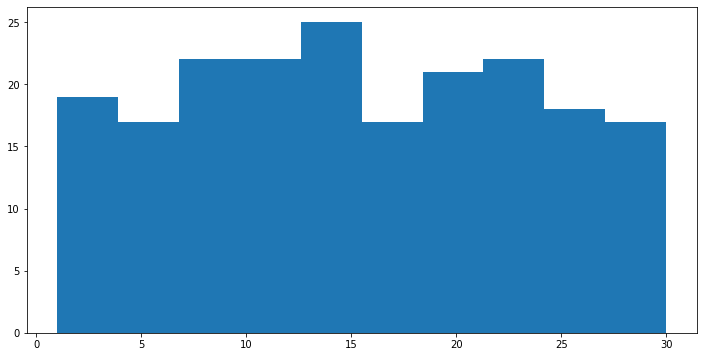

In [66]:
sample = np.array([
    25, 6, 30, 22, 10, 27, 21, 3, 29, 13, 25, 12, 25, 8, 14, 3, 12, 6, 5, 2,
    1, 30, 17, 22, 25, 27, 29, 16, 2, 4, 13, 26, 10, 12, 17, 20, 9, 8, 23, 7,
    20, 17, 19, 15, 24, 2, 18, 6, 8, 22, 8, 8, 21, 24, 29, 16, 20, 28, 1, 21,
    1, 14, 17, 11, 26, 4, 30, 5, 11, 22, 12, 1, 9, 30, 15, 2, 1, 2, 8, 9, 24,
    15, 16, 15, 8, 14, 1, 28, 11, 2, 19, 12, 15, 5, 22, 11, 9, 22, 16, 20, 14,
    27, 20, 22, 26, 4, 24, 27, 6, 1, 5, 29, 15, 20, 14, 23, 4, 14, 20, 15, 15,
    9, 26, 30, 13, 18, 11, 22, 10, 26, 11, 23, 22, 30, 15, 17, 4, 8, 14, 10, 8,
    19, 9, 23, 9, 22, 15, 12, 5, 5, 26, 20, 13, 22, 19, 26, 10, 29, 17, 19, 24,
    27, 12, 15, 27, 26, 2, 30, 3, 16, 9, 11, 4, 17, 3, 12, 9, 17, 24, 13, 22,
    20, 2, 4, 11, 21, 29, 20, 19, 16, 8, 13, 12, 20, 28, 9, 15, 30, 9, 17
])
plt.figure(figsize=(12, 6))
plt.hist(sample);

In [67]:
shapiro_test_1 = stats.shapiro(sample)

print(
    "Выборочные характеристики данных"
    "\nВыборочное среднее: %.3f" %sample.mean(),
    "\nВыборочная дисперсия: %.3f" %sample.var(),
    "\nВыборочное среднеквадратичное отклонение: %.3f" %sample.std(),
    "\nСтатистика теста Манна-Уитни: %.6f" %shapiro_test_1[0],
    "\np-value теста Манна-Уитни: %.6f" %shapiro_test_1[1],
    "\nПри уровне значимости alpha = 0.05 мы отвергаем гипотезу о принадлежности выборки к нормальному распределению"
)

Выборочные характеристики данных
Выборочное среднее: 15.380 
Выборочная дисперсия: 69.886 
Выборочное среднеквадратичное отклонение: 8.360 
Статистика теста Манна-Уитни: 0.962556 
p-value теста Манна-Уитни: 0.000038 
При уровне значимости alpha = 0.05 мы отвергаем гипотезу о принадлежности выборки к нормальному распределению


## Задание 2
Психолога цікавило, чи існують відмінності між особами, що різняться за рівнем інтелектуальної
витривалості (низький/високий), у показниках емпатії. Обґрунтуйте вибір критерію та інтерпретуйте
отриманий результат.
Показники емпатії у осіб з низьким рівнем інтелектуальної витривалості: 
<br>24, 10, 11, 22, 22, 6, 14, 19, 5, 5, 19, 15, 25, 9, 12, 5, 5, 19, 18, 5, 11, 15, 21, 20, 21, 12, 18, 11, 4, 16, 9, 2, 1, 20, 24, 22, 1, 12, 16, 5, 17, 9, 20, 16, 18, 7, 21, 22, 25, 13
<br>Показники емпатії у осіб з високим рівнем інтелектуальної витривалості: 
<br>16, 22, 19, 26, 15, 12, 14, 25, 8, 8, 11, 16, 30, 19, 30, 7, 24, 17, 23, 13, 30, 16, 15, 27, 27, 15, 23, 28, 14, 14, 8, 24, 29, 20, 19, 13, 26, 27, 8, 27, 28, 12, 12, 27, 24, 12, 28, 18, 23, 20

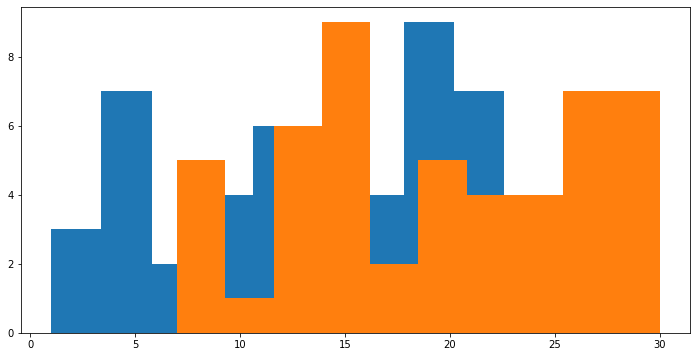

In [171]:
test_a = np.array([
    24, 10, 11, 22, 22, 6, 14, 19, 5, 5, 19, 15, 25, 9, 12, 5, 5, 19, 18, 5,
    11, 15, 21, 20, 21, 12, 18, 11, 4, 16, 9, 2, 1, 20, 24, 22, 1, 12, 16, 5,
    17, 9, 20, 16, 18, 7, 21, 22, 25, 13
])
test_b = np.array([
    16, 22, 19, 26, 15, 12, 14, 25, 8, 8, 11, 16, 30, 19, 30, 7, 24, 17, 23,
    13, 30, 16, 15, 27, 27, 15, 23, 28, 14, 14, 8, 24, 29, 20, 19, 13, 26, 27,
    8, 27, 28, 12, 12, 27, 24, 12, 28, 18, 23, 20
])

plt.figure(figsize=(12, 6))
plt.hist(test_a);
plt.hist(test_b);

In [173]:
print(
    "Проверим принадлежность выборок к нормальному распределению, для возможности использовать тест Стьюдента:",
    "\np-value выборки 1 теста Шапиро-Уилка: %.4f" %(scipy.stats.shapiro(test_a)[1]),
    "\np-value выборки 1 теста Колмогорова-Смирнова: %.4f" %(scipy.stats.kstest(test_a, "norm")[1]),
    "\np-value выборки 2 теста Шапиро-Уилка: %.4f" %(scipy.stats.shapiro(test_b)[1]),
    "\np-value выборки 2 теста Колмогорова-Смирнова: %.4f" %(scipy.stats.kstest(test_a, "norm")[1]),
    "\nВывод: при уровне значимости 0.05 отвергаем гипотезу о нормальности данных, следовательно используем непараметрический аналог критерия Стьюдента - ранговый критерий Манна-Уитни"
)

whitney_test = stats.mannwhitneyu(
    test_a,
    test_b
)

print(
    "\nВыборочные характеристики данных:",
    "\nВыборка 1:",
    "\nКоличество элементов: %i" %len(test_a),
    "\nСреднее %.3f:" %test_a.mean(),
    "\nДисперсия %.3f:" %test_a.var(),
    "\n\nВыборка 2:",
    "\nКоличество элементов: %i" %len(test_b),
    "\nСреднее %.3f:" %test_b.mean(),
    "\nДисперсия %.3f:" %test_b.var(),
    "\n\nРазница в средних значениях: %.3f" %(test_b.mean() - test_a.mean()) 
)

print(
    "Результаты теста Манна-Уитни:",
    "\np-value: %.4f" %whitney_test[1],
    "\nСтатистика: %.4f" %whitney_test[0],
    "\nПри уровне значимости 0.05 мы отвергаем гипотезу о равенстве средних в пользу выборки 2"
)

Проверим принадлежность выборок к нормальному распределению, для возможности использовать тест Стьюдента: 
p-value выборки 1 теста Шапиро-Уилка: 0.0242 
p-value выборки 1 теста Колмогорова-Смирнова: 0.0000 
p-value выборки 2 теста Шапиро-Уилка: 0.0114 
p-value выборки 2 теста Колмогорова-Смирнова: 0.0000 
Вывод: при уровне значимости 0.05 отвергаем гипотезу о нормальности данных, следовательно используем непараметрический аналог критерия Стьюдента - ранговый критерий Манна-Уитни

Выборочные характеристики данных: 
Выборка 1: 
Количество элементов: 50 
Среднее 13.980: 
Дисперсия 48.220: 

Выборка 2: 
Количество элементов: 50 
Среднее 19.380: 
Дисперсия 48.036: 

Разница в средних значениях: 5.400
Результаты теста Манна-Уитни: 
p-value: 0.0003 
Статистика: 756.5000 
При уровне значимости 0.05 мы отвергаем гипотезу о равенстве средних в пользу выборки 2


## Задание 3
Психолога цікавило, чи впливає вік експериментатора (молодий/літнього віку) на точність виконання
графічного завдання (точність оцінювалася через кількість помилок). Дослідження проводилося за
міжгруповим планом. Обґрунтуйте вибір критерію та інтерпретуйте отриманий результат.
Кількість помилок за участі молодого експериментатора: 
<br>10, 8, 12, 1, 13, 4, 15, 8, 13, 4, 4, 8, 6, 6, 8, 6, 15,
13, 13, 14, 2, 14, 11, 5, 12, 2, 8, 2, 5, 14

<br> Кількість помилок за участі експериментатора літнього віку: 
<br>11, 6, 2, 5, 11, 11, 6, 9, 4, 2, 6, 2, 15, 8, 9, 2,
5, 15, 8, 12, 3, 10, 15, 10, 14, 9, 14, 12, 3, 14


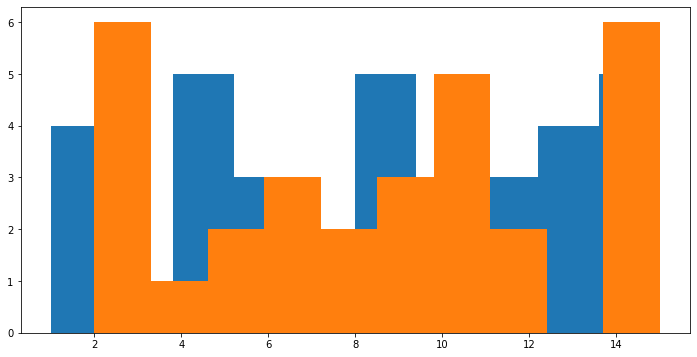

In [75]:
test_a = np.array([
    10, 8, 12, 1, 13, 4, 15, 8, 13, 4, 4, 8, 6, 6, 8, 6, 
    15, 13, 13, 14, 2, 14, 11, 5, 12, 2, 8, 2, 5, 14
])
test_b = np.array([
    11, 6, 2, 5, 11, 11, 6, 9, 4, 2, 6, 2, 15, 8, 9, 2,
    5, 15, 8, 12, 3, 10, 15, 10, 14, 9, 14, 12, 3, 14
])

plt.figure(figsize=(12, 6))
plt.hist(test_a);
plt.hist(test_b);

In [86]:
shapiro_a = scipy.stats.shapiro(test_a)
ks_a = scipy.stats.kstest(test_a, "norm")

shapiro_b = scipy.stats.shapiro(test_b)
ks_b = scipy.stats.kstest(test_b, "norm")

print(
    "Проверим принадлежность выборок к нормальному распределению, для возможности использовать тест Стьюдента:",
    "\nТест Шапиро-Уилка выборки 1: p-value = %.4f; статистика = %.4f" %(shapiro_a[1], shapiro_a[0]),
    "\nТест Колмогорова-Смирнова выборки 1: p-value = %.4f; статистика = %.4f" %(ks_a[1], ks_a[0]),
    "\nТест Шапиро-Уилка выборки 2: p-value = %.4f; статистика = %.4f" %(shapiro_b[1], shapiro_b[0]),
    "\nТест Колмогорова-Смирнова выборки 2: p-value = %.4f; статистика = %.4f" %(ks_b[1], ks_b[0]),
    "\nВывод: при уровне значимости 0.05 отвергаем гипотезу о нормальности данных, следовательно используем непараметрический аналог критерия Стьюдента - ранговый критерий Манна-Уитни",
    
    "\n\nВыборочные характеристики данных",
    
    "\n\nВыборка 1:",
    "\nКоличество элементов: %i" %len(test_a),
    "\nСреднее %.3f:" %test_a.mean(),
    "\nДисперсия %.3f:" %test_a.var(),
    
    "\n\nВыборка 2:",
    "\nКоличество элементов: %i" %len(test_b),
    "\nСреднее %.3f:" %test_b.mean(),
    "\nДисперсия %.3f:" %test_b.var(),
    "\n\nРазница в средних значениях: %.3f" %(test_b.mean() - test_a.mean()) 
)

whitney_test =  scipy.stats.mannwhitneyu(test_a, test_b)

print(
    "Результаты теста Манна-Уитни:",
    "\np-value: %.4f" %whitney_test[1],
    "\nСтатистика: %.4f" %whitney_test[0],
    "\nПри уровне значимости 0.05 мы принимаем гипотезу о равенстве средних в двух выборках"
)

Проверим принадлежность выборок к нормальному распределению, для возможности использовать тест Стьюдента: 
Тест Шапиро-Уилка выборки 1: p-value = 0.0350; статистика = 0.9244 
Тест Колмогорова-Смирнова выборки 1: p-value = 0.0000; статистика = 0.9439 
Тест Шапиро-Уилка выборки 2: p-value = 0.0454; статистика = 0.9287 
Тест Колмогорова-Смирнова выборки 2: p-value = 0.0000; статистика = 0.9772 
Вывод: при уровне значимости 0.05 отвергаем гипотезу о нормальности данных, следовательно используем непараметрический аналог критерия Стьюдента - ранговый критерий Манна-Уитни 

Выборочные характеристики данных 

Выборка 1: 
Количество элементов: 30 
Среднее 8.533: 
Дисперсия 19.249: 

Выборка 2: 
Количество элементов: 30 
Среднее 8.433: 
Дисперсия 18.646: 

Разница в средних значениях: -0.100
Результаты теста Манна-Уитни: 
p-value: 0.4911 
Статистика: 448.0000 
При уровне значимости 0.05 мы принимаем гипотезу о равенстве средних в двух выборках


## Задание 4
Психолога цікавило, чи впливає вік експериментатора (молодий/літнього віку) на точність виконання
графічного завдання (точність оцінювалася через кількість помилок). Дослідження проводилося за
внутрішньосуб’єктним планом. Обґрунтуйте вибір критерію та інтерпретуйте отриманий результат.
<br>Кількість помилок за участі молодого експериментатора: 
<br>1, 5, 14, 9, 19, 20, 17, 2, 3, 17, 14, 15, 6, 5, 1, 12,
18, 12, 6, 4, 6, 13, 3, 20, 2, 20, 20, 12, 15, 9
<br><br>Кількість помилок за участі експериментатора літнього віку: 
<br>15, 9, 10, 4, 4, 1, 10, 4, 3, 6, 10, 12, 5, 15, 10,
10, 7, 14, 7, 6, 1, 3, 3, 7, 5, 2, 9, 1, 1, 13


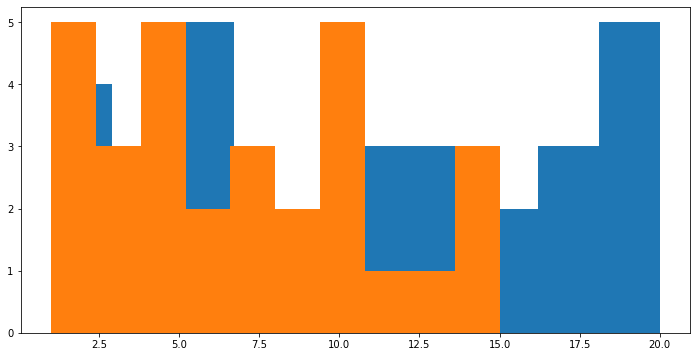

In [87]:
test_a = np.array([
    1, 5, 14, 9, 19, 20, 17, 2, 3, 17, 14, 15, 6, 5, 1,
    12, 18, 12, 6, 4, 6, 13, 3, 20, 2, 20, 20, 12, 15, 9
])
test_b = np.array([
    15, 9, 10, 4, 4, 1, 10, 4, 3, 6, 10, 12, 5, 15, 10,
    10, 7, 14, 7, 6, 1, 3, 3, 7, 5, 2, 9, 1, 1, 13
])

plt.figure(figsize=(12, 6))
plt.hist(test_a);
plt.hist(test_b);

In [94]:
shapiro_a = scipy.stats.shapiro(test_a)
ks_a = scipy.stats.kstest(test_a, "norm")

shapiro_b = scipy.stats.shapiro(test_b)
ks_b = scipy.stats.kstest(test_b, "norm")

print(
    "Проверим принадлежность выборок к нормальному распределению, для возможности использовать тест Стьюдента:",
    "\nТест Шапиро-Уилка выборки 1: p-value = %.4f; статистика = %.4f" %(shapiro_a[1], shapiro_a[0]),
    "\nТест Колмогорова-Смирнова выборки 1: p-value = %.4f; статистика = %.4f" %(ks_a[1], ks_a[0]),
    "\nТест Шапиро-Уилка выборки 2: p-value = %.4f; статистика = %.4f" %(shapiro_b[1], shapiro_b[0]),
    "\nТест Колмогорова-Смирнова выборки 2: p-value = %.4f; статистика = %.4f" %(ks_b[1], ks_b[0]),
    "\nВывод: при уровне значимости 0.05 отвергаем гипотезу о нормальности данных первой выборки. Для большей строгости, воспользуемся непараметрическим аналогом парного критерия Стьюдента - критерием знаков Уилкоксона",
    
    "\n\nВыборочные характеристики данных",
    
    "\n\nВыборка 1:",
    "\nКоличество элементов: %i" %len(test_a),
    "\nСреднее %.3f:" %test_a.mean(),
    "\nДисперсия %.3f:" %test_a.var(),
    
    "\n\nВыборка 2:",
    "\nКоличество элементов: %i" %len(test_b),
    "\nСреднее %.3f:" %test_b.mean(),
    "\nДисперсия %.3f:" %test_b.var(),
    "\n\nРазница в средних значениях: %.3f" %abs(test_b.mean() - test_a.mean()) 
)

wilcox_test = stats.wilcoxon(test_a, test_b)

print(
    "Результаты теста Уилкоксона:",
    "\np-value: %.4f" %wilcox_test[1],
    "\nСтатистика: %.4f" %wilcox_test[0],
    "\nПри уровне значимости 0.05 мы отвергаем нулевую гипотезу о том, что выборки взяты из единой генеральной совокупности \n(между группами есть разница)"
)

Проверим принадлежность выборок к нормальному распределению, для возможности использовать тест Стьюдента: 
Тест Шапиро-Уилка выборки 1: p-value = 0.0189; статистика = 0.9141 
Тест Колмогорова-Смирнова выборки 1: p-value = 0.0000; статистика = 0.9106 
Тест Шапиро-Уилка выборки 2: p-value = 0.0852; статистика = 0.9389 
Тест Колмогорова-Смирнова выборки 2: p-value = 0.0000; статистика = 0.8439 
Вывод: при уровне значимости 0.05 отвергаем гипотезу о нормальности данных первой выборки. Для большей строгости, воспользуемся непараметрическим аналогом парного критерия Стьюдента - критерием знаков Уилкоксона 

Выборочные характеристики данных 

Выборка 1: 
Количество элементов: 30 
Среднее 10.667: 
Дисперсия 41.889: 

Выборка 2: 
Количество элементов: 30 
Среднее 6.900: 
Дисперсия 18.157: 

Разница в средних значениях: 3.767
Результаты теста Уилкоксона: 
p-value: 0.0207 
Статистика: 101.5000 
При уровне значимости 0.05 мы отвергаем нулевую гипотезу о том, что выборки взяты из единой генеральной

## Задание 5
Психолога цікавило, чи існують відмінності, пов’язані із рівнем експресивності особи (низький/
середній/ високий), у проявах особистісної тривожності. Обґрунтуйте вибір критерію та інтерпретуйте
отриманий результат.

<br>Показники особистісної тривожності у осіб із низьким рівнем експресивності: 
<br>8, 19, 18, 12, 15, 3, 2, 8,
21, 22, 1, 4, 12, 9, 11, 7, 6, 1, 20, 7, 6, 5, 6, 12, 18, 5, 4, 17, 21, 19, 18, 6, 15, 13, 17, 8, 16, 19, 15, 14, 18, 16,
18, 8, 2

<br>Показники особистісної тривожності у осіб із середнім рівнем експресивності: 
<br>23, 16, 16, 8, 8, 16, 12, 24,
12, 13, 21, 17, 21, 11, 8, 14, 16, 12, 22, 17, 13, 20, 13, 11, 7, 8, 15, 16, 24, 14, 22, 22, 23, 13, 23, 25, 22, 10, 23,
9, 16, 19, 19, 12, 23

<br>Показники особистісної тривожності у осіб із високим рівнем експресивності: 
<br>28, 17, 12, 16, 21, 18, 24,
18, 23, 21, 25, 30, 22, 14, 26, 20, 29, 25, 23, 19, 30, 13, 15, 30, 20, 19, 15, 18, 15, 12, 23, 13, 17, 23, 18, 26, 30,
30, 14, 23, 21, 27, 22, 12, 29

Для поправки на множественные сравнения воспользуемся пост-хок надстройкой над тестом Краскала-Уоллиса - тестом Коновера-Имана, основанном на z-статистике, этот тест является асимптотически более мощным, чем тест Данна, использующим поправки Бонферрони (статья https://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-07677-MS). Причины, по которой мы используем поправки на попарные сравнения - ошибка множественных сравнений (Family Wise Error Rate), основные поправки Бонферрони и Холма рассмотренны в статье https://pdfs.semanticscholar.org/7f0a/29a89655d7998efc7bb53e695b3b950bf7fd.pdf

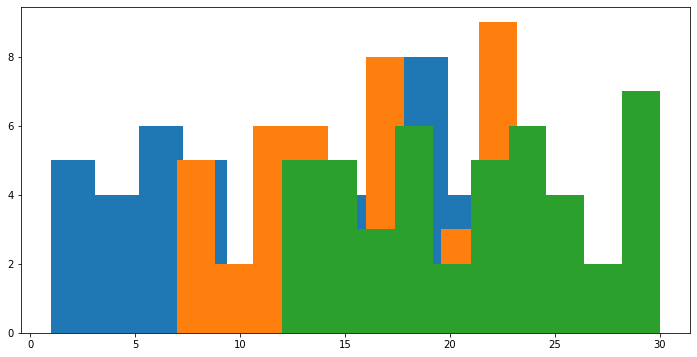

In [96]:
test_a = np.array([
    8, 19, 18, 12, 15, 3, 2, 8, 21, 22, 1, 4, 12, 9, 11, 7, 6, 1, 20,
    7, 6, 5, 6, 12, 18, 5, 4, 17, 21, 19, 18, 6, 15, 13, 17, 8, 16, 19,
    15, 14, 18, 16, 18, 8, 2
])
test_b = np.array([
    23, 16, 16, 8, 8, 16, 12, 24, 12, 13, 21, 17, 21, 11, 8, 14, 16, 12, 22,
    17, 13, 20, 13, 11, 7, 8, 15, 16, 24, 14, 22, 22, 23, 13, 23, 25, 22, 10,
    23, 9, 16, 19, 19, 12, 23
])
test_c = np.array([
    28, 17, 12, 16, 21, 18, 24, 18, 23, 21, 25, 30, 22, 14, 26, 20, 29, 25, 23,
    19, 30, 13, 15, 30, 20, 19, 15, 18, 15, 12, 23, 13, 17, 23, 18, 26, 30, 30,
    14, 23, 21, 27, 22, 12, 29
])

plt.figure(figsize=(12, 6))
plt.hist(test_a);
plt.hist(test_b);
plt.hist(test_c);

In [143]:
import scikit_posthocs as sp

shapiro_a = scipy.stats.shapiro(test_a)
shapiro_b = scipy.stats.shapiro(test_b)
shapiro_c = scipy.stats.shapiro(test_c)

print(
    "Проверим принадлежность выборок к нормальному распределению, для возможности использовать тест Стьюдента:",
    "\nТест Шапиро-Уилка выборки 1: p-value = %.4f; статистика = %.4f" %(shapiro_a[1], shapiro_a[0]),
    "\nТест Шапиро-Уилка выборки 2: p-value = %.4f; статистика = %.4f" %(shapiro_b[1], shapiro_b[0]),
    "\nТест Шапиро-Уилка выборки 3: p-value = %.4f; статистика = %.4f" %(shapiro_c[1], shapiro_c[0]),
    "\n\nВывод: при уровне значимости 0.05 отвергаем гипотезу о нормальности данных для всех выборок.",
    "\nТак как дисперсионный анализ является многомерным обобщением критерия Стьюдента, использовать его мы не можем.",
    "\nВоспользуемся критерием Краскала-Уоллиса - многомерным обобщением критерия Манна-Уитни",
    
    "\n\nВыборочные характеристики данных",
    
    "\n\nВыборка 1:",
    "\nКоличество элементов: %i" %len(test_a),
    "\nСреднее %.3f:" %test_a.mean(),
    "\nДисперсия %.3f:" %test_a.var(),
    
    "\n\nВыборка 2:",
    "\nКоличество элементов: %i" %len(test_b),
    "\nСреднее %.3f:" %test_b.mean(),
    "\nДисперсия %.3f:" %test_b.var(),
    
    "\n\nВыборка 3:",
    "\nКоличество элементов: %i" %len(test_c),
    "\nСреднее %.3f:" %test_c.mean(),
    "\nДисперсия %.3f:" %test_c.var(),
)

test_result = stats.kruskal(test_a, test_b, test_c)
test_conover = sp.posthoc_conover(
    [test_a, test_b, test_c],
    p_adjust = "holm-sidak"
)
print(
    "\nРезультаты теста Краскала-Уоллиса:",
    "\np-value: %.4f" %test_result[1],
    "\nСтатистика: %.4f" %test_result[0],
    "\nПри уровне значимости 0.05 мы отвергаем нулевую гипотезу о том, что ВСЕ выборки взяты из единой генеральной совокупности",
    "\nДля того, чтобы определить между какими группами есть разница, воспользуемся пост-хок тестом Коновера:"
)

print(
    test_conover,
    "\nСтатистически значимая разница с уровнем значимости 0.05 выявлена между КАЖДОЙ группой в попарном сравнении"
)

Проверим принадлежность выборок к нормальному распределению, для возможности использовать тест Стьюдента: 
Тест Шапиро-Уилка выборки 1: p-value = 0.0137; статистика = 0.9346 
Тест Шапиро-Уилка выборки 2: p-value = 0.0176; статистика = 0.9377 
Тест Шапиро-Уилка выборки 3: p-value = 0.0411; статистика = 0.9476 

Вывод: при уровне значимости 0.05 отвергаем гипотезу о нормальности данных для всех выборок. 
Так как дисперсионный анализ является многомерным обобщением критерия Стьюдента, использовать его мы не можем. 
Воспользуемся критерием Краскала-Уоллиса - многомерным обобщением критерия Манна-Уитни 

Выборочные характеристики данных 

Выборка 1: 
Количество элементов: 45 
Среднее 11.600: 
Дисперсия 39.484: 

Выборка 2: 
Количество элементов: 45 
Среднее 16.200: 
Дисперсия 28.071: 

Выборка 3: 
Количество элементов: 45 
Среднее 21.022: 
Дисперсия 31.355:

Результаты теста Краскала-Уоллиса: 
p-value: 0.0000 
Статистика: 37.4012 
При уровне значимости 0.05 мы отвергаем нулевую гипотезу о т

## Задание 6
Психолога цікавило, чи існує зв’язок між інтроверсією/інтроверсією (1/2) та переживанням щастя (1/2 :
нещасливий/щасливий) Обґрунтуйте вибір критерію та інтерпретуйте отриманий результат.
<br><br>Інтроверсія/екстраверсія: 
<br>2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2
<br><br>Нещасливий/щасливий: 
<br>1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1


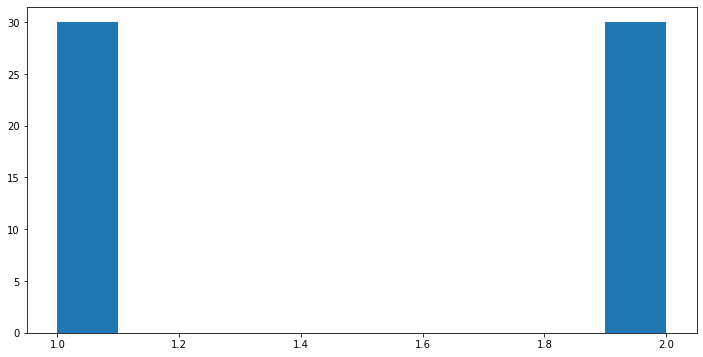

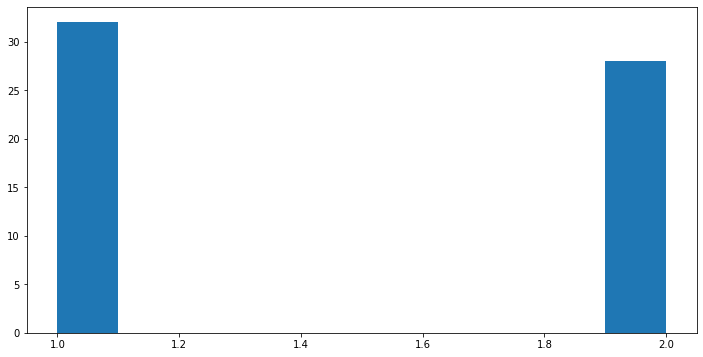

In [147]:
test_a = np.array([
    2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
    1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
    1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2
])
test_b = np.array([
    1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
    2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2,
    2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1
])

plt.figure(figsize=(12, 6))
plt.hist(test_a);
plt.figure(figsize=(12, 6))
plt.hist(test_b);

In [158]:
print("НАДО СДЕЛАТЬ")

НАДО СДЕЛАТЬ


## Задание 7
Психолога цікавило, чи існує зв’язок між відповідальністю особистості (діагностовано за допомогою
опитувальника особистісного симптомокомплексу відповідальності І.А.Кочаряна) та її здатністю до
рефлексії (діагностовано за допомогою опитувальника рефлексивності А. В. Карпова.). Обґрунтуйте
вибір критерію та інтерпретуйте отриманий результат.
<br><br>Показники відповідальності особистості: 
<br>5, 9, 7, 8, 6, 8, 4, 6, 7, 10, 9, 1, 5, 2, 9, 7, 7, 6, 2, 3, 5, 6, 4, 2, 8, 6,
9, 8, 4, 1, 6, 9, 5, 11, 8, 5, 7, 9, 6, 6, 4, 8, 2, 6, 9, 5, 7, 10, 2, 10, 7, 11, 9, 7, 9, 8, 10, 4, 4, 9, 6, 7, 6, 8, 8, 8, 7, 4,
11, 4, 9, 9, 6, 8, 4, 8, 6, 6, 5, 6, 4, 10, 7, 3, 6, 10, 6, 11, 5, 5, 3, 9, 5, 4, 4, 5, 5, 5, 5, 7
<br><br>Показники здатності до рефлексії: 
<br>6, 9, 8, 8, 6, 6, 4, 2, 8, 11, 9, 5, 7, 1, 8, 12, 2, 12, 9, 11, 7, 12, 3, 8, 11, 5,
11, 10, 8, 3, 4, 3, 8, 9, 9, 7, 7, 6, 8, 8, 2, 11, 5, 9, 9, 7, 8, 13, 4, 5, 1, 9, 9, 4, 9, 7, 7, 2, 6, 10, 11, 5, 5, 7, 8, 6, 6, 5,
8, 1, 4, 11, 11, 6, 4, 9, 1, 5, 8, 7, 8, 3, 5, 3, 10, 7, 5, 10, 1, 8, 7, 10, 6, 3, 5, 7, 10, 9, 9, 10


График зависимости значений выборки 1 от значений из выборки 2


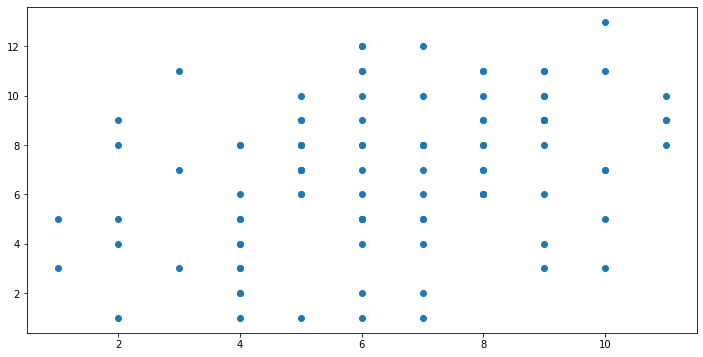

In [168]:
test_a = np.array([
    5, 9, 7, 8, 6, 8, 4, 6, 7, 10, 9, 1, 5, 2, 9, 7, 7, 6, 2, 3, 5, 6, 4,
    2, 8, 6, 9, 8, 4, 1, 6, 9, 5, 11, 8, 5, 7, 9, 6, 6, 4, 8, 2, 6, 9, 5,
    7, 10, 2, 10, 7, 11, 9, 7, 9, 8, 10, 4, 4, 9, 6, 7, 6, 8, 8, 8, 7, 4,
    11, 4, 9, 9, 6, 8, 4, 8, 6, 6, 5, 6, 4, 10, 7, 3, 6, 10, 6, 11, 5, 5,
    3, 9, 5, 4, 4, 5, 5, 5, 5, 7
])
test_b = np.array([
    6, 9, 8, 8, 6, 6, 4, 2, 8, 11, 9, 5, 7, 1, 8, 12, 2, 12, 9, 11, 7, 12,
    3, 8, 11, 5, 11, 10, 8, 3, 4, 3, 8, 9, 9, 7, 7, 6, 8, 8, 2, 11, 5, 9, 9,
    7, 8, 13, 4, 5, 1, 9, 9, 4, 9, 7, 7, 2, 6, 10, 11, 5, 5, 7, 8, 6, 6, 5,
    8, 1, 4, 11, 11, 6, 4, 9, 1, 5, 8, 7, 8, 3, 5, 3, 10, 7, 5, 10, 1, 8, 7,
    10, 6, 3, 5, 7, 10, 9, 9, 10
])

print("График зависимости значений выборки 1 от значений из выборки 2")
plt.figure(figsize=(12, 6))
plt.scatter(test_a, test_b);

In [170]:
corr = stats.pearsonr(test_a, test_b)
print(
    "Линейный коэффициент корреляции Пирсона: %.4f" %corr[0],
    "\np-value корреляции Пирсона: %.4f" %corr[1],
    "\nМежду значениями выборок присутствует линейная корреляция и линейный тренд",
    "\n(чем больше значения выборки 2, тем больше значения выборки 1)"
)

Линейный коэффициент корреляции Пирсона: 0.3666 
p-value корреляции Пирсона: 0.0002 
Между значениями выборок присутствует линейная корреляция и линейный тренд 
(чем больше значения выборки 2, тем больше значения выборки 1)


## Задание 7
Психолога цікавило, чи існує зв’язок між комунікативною толерантністю (діагностовано за допомогою
опитувальника комунікативної толерантності В.В. Бойко) та її здатністю до рефлексії (діагностовано за
допомогою опитувальника рефлексивності А. В. Карпова.). Обґрунтуйте вибір критерію та
інтерпретуйте отриманий результат.
<br><br>Показники комунікативної толерантності: 
<br>49, 51, 63, 55, 36, 36, 34, 36, 32, 78, 53, 62, 39, 36, 58, 32, 43,
61, 53, 46, 38, 22, 40, 35, 61, 38, 52, 27, 52, 48, 29, 70, 56, 56, 22, 64, 52, 28, 78, 56, 106, 61, 44, 39, 53, 47,
44, 57, 34, 16, 35, 47, 39, 70, 39, 49, 70, 45, 59, 57, 31, 72, 77, 34, 44, 55, 42, 54, 32, 23, 51, 42, 23, 64, 50, 28,
71, 30, 31, 57, 24, 65, 34, 18, 18, 68, 29, 38, 72, 69, 65, 89, 58, 76, 31, 31, 50, 79, 48, 46, 79, 26, 33, 29, 50, 27,
47, 67, 50, 50, 53, 58, 73, 56, 24, 37, 28, 50, 65, 65, 46, 45, 73, 40, 37, 41, 33, 42, 48, 78, 49, 35, 52, 36, 44, 31,
61, 27, 55, 28, 44, 33, 67, 18, 24, 24, 58, 22, 25, 34, 31, 48, 47, 54, 40, 48, 69, 33, 60, 26, 77, 48, 45, 69, 39, 61,
36, 51, 59, 60, 43, 68, 25, 61, 45, 38, 45, 35, 57, 43, 18, 20, 40, 45, 57, 47, 75, 57, 79, 48, 72, 85, 67, 30, 20, 48,
44, 61, 66, 78
<br><br>Показники здатності до рефлексії: 
<br>53, 76, 55, 48, 55, 84, 56, 50, 58, 67, 57, 42, 75, 53, 50, 50, 74,
48, 61, 68, 53, 79, 61, 53, 63, 63, 53, 61, 80, 72, 58, 36, 45, 65, 60, 52, 63, 62, 68, 58, 28, 51,
47, 55, 60, 40, 52, 58, 56, 72, 53, 53, 58, 48, 41, 71, 40, 65, 72, 50, 70, 52, 51, 10, 70, 86, 48, 50,
47, 65, 41, 57, 57, 69, 45, 58, 60, 46, 78, 73, 56, 60, 44, 51, 57, 63, 50, 75, 35, 51, 45, 47, 58,
44, 58, 44, 63, 51, 44, 58, 57, 52, 51, 72, 39, 45, 47, 59, 38, 43, 71, 49, 45, 54, 47, 29, 91, 41,
58, 51, 43, 59, 38, 68, 60, 63, 51, 44, 58, 57, 64, 62, 52, 52, 46, 44, 50, 51, 59, 72, 56, 50, 32,
60, 59, 68, 44, 68, 60, 63, 51, 44, 58, 72, 60, 42, 36, 56, 60, 68, 39, 35, 43, 60, 62, 52, 56, 52,
72, 54, 50, 44, 52, 45, 53, 56, 49, 58, 41, 62, 44, 37, 67, 64, 59, 60, 53, 35, 21, 25, 34, 44, 32,
32, 36, 25, 67, 43, 37, 31


График зависимости значений выборки 1 от значений из выборки 2


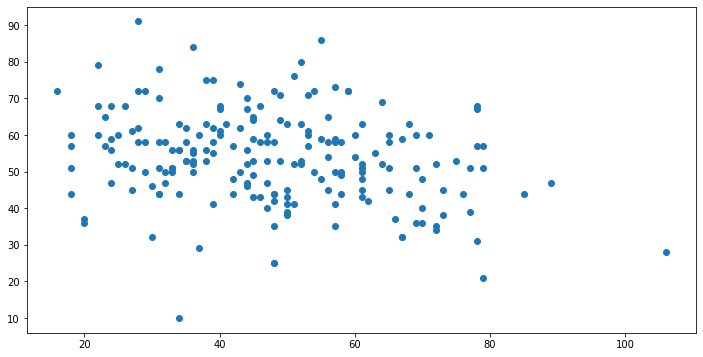

In [167]:
test_a = np.array([
    49, 51, 63, 55, 36, 36, 34, 36, 32, 78, 53, 62, 39, 36, 58, 32,
    43, 61, 53, 46, 38, 22, 40, 35, 61, 38, 52, 27, 52, 48, 29, 70,
    56, 56, 22, 64, 52, 28, 78, 56, 106, 61, 44, 39, 53, 47, 44, 57,
    34, 16, 35, 47, 39, 70, 39, 49, 70, 45, 59, 57, 31, 72, 77, 34, 44,
    55, 42, 54, 32, 23, 51, 42, 23, 64, 50, 28, 71, 30, 31, 57, 24, 65,
    34, 18, 18, 68, 29, 38, 72, 69, 65, 89, 58, 76, 31, 31, 50, 79, 48, 
    46, 79, 26, 33, 29, 50, 27, 47, 67, 50, 50, 53, 58, 73, 56, 24, 37, 
    28, 50, 65, 65, 46, 45, 73, 40, 37, 41, 33, 42, 48, 78, 49, 35, 52, 
    36, 44, 31, 61, 27, 55, 28, 44, 33, 67, 18, 24, 24, 58, 22, 25, 34, 
    31, 48, 47, 54, 40, 48, 69, 33, 60, 26, 77, 48, 45, 69, 39, 61, 36, 
    51, 59, 60, 43, 68, 25, 61, 45, 38, 45, 35, 57, 43, 18, 20, 40, 45, 
    57, 47, 75, 57, 79, 48, 72, 85, 67, 30, 20, 48, 44, 61, 66, 78
])
test_b = np.array([
    53, 76, 55, 48, 55, 84, 56, 50, 58, 67, 57, 42, 75, 53, 50, 50, 74, 
    48, 61, 68, 53, 79, 61, 53, 63, 63, 53, 61, 80, 72, 58, 36, 45, 65,
    60, 52, 63, 62, 68, 58, 28, 51, 47, 55, 60, 40, 52, 58, 56, 72, 53, 
    53, 58, 48, 41, 71, 40, 65, 72, 50, 70, 52, 51, 10, 70, 86, 48, 50, 
    47, 65, 41, 57, 57, 69, 45, 58, 60, 46, 78, 73, 56, 60, 44, 51, 57, 
    63, 50, 75, 35, 51, 45, 47, 58, 44, 58, 44, 63, 51, 44, 58, 57, 52, 
    51, 72, 39, 45, 47, 59, 38, 43, 71, 49, 45, 54, 47, 29, 91, 41, 58, 
    51, 43, 59, 38, 68, 60, 63, 51, 44, 58, 57, 64, 62, 52, 52, 46, 44, 
    50, 51, 59, 72, 56, 50, 32, 60, 59, 68, 44, 68, 60, 63, 51, 44, 58, 
    72, 60, 42, 36, 56, 60, 68, 39, 35, 43, 60, 62, 52, 56, 52, 72, 54, 
    50, 44, 52, 45, 53, 56, 49, 58, 41, 62, 44, 37, 67, 64, 59, 60, 53, 
    35, 21, 25, 34, 44, 32, 32, 36, 25, 67, 43, 37, 31
])

print("График зависимости значений выборки 1 от значений из выборки 2")
plt.figure(figsize=(12, 6))
plt.scatter(test_a, test_b);

In [169]:
corr = stats.pearsonr(test_a, test_b)
print(
    "Линейный коэффициент корреляции Пирсона: %.4f" %corr[0],
    "\np-value корреляции Пирсона: %.4f" %corr[1],
    "\nМежду значениями выборок присутствует отрицательная линейная корреляция и линейный тренд",
    "\n(чем больше значения выборки 2, тем меньше значения выборки 1)"
)

Линейный коэффициент корреляции Пирсона: 0.3666 
p-value корреляции Пирсона: 0.0002 
Между значениями выборок присутствует отрицательная линейная корреляция и линейный тренд 
(чем больше значения выборки 2, тем меньше значения выборки 1)
